# Comparando os Algoritmos

Cada sistema contém linhas de montagem.

Cada linha de montagem contém estações, um custo de entrada e um custo de saída.

Cada estação tem um custo e contém transições pra próxima estação das linhas adjacentes.

Cada transição tem um custo.

Os custos serão aleatórios, mas com valores inteiros entre 1 e 1000.

A quantidade de estações será incrementada gradualmente.

In [10]:
from solver import IterativeSystem3, RecursiveSystem3

### Montando os sistemas de 3 linhas com custos aleatórios

In [11]:
from random import randint

upper_limit = 1000

def set_up_systems_for_n_stations(n: int) -> tuple[RecursiveSystem3, IterativeSystem3]:
	assembly_line_1 = [randint(1, upper_limit) for _ in range(n)]
	assembly_line_2 = [randint(1, upper_limit) for _ in range(n)]
	assembly_line_3 = [randint(1, upper_limit) for _ in range(n)]

	entries = [randint(1, upper_limit) for _ in range(3)]
	stations = [assembly_line_1, assembly_line_2, assembly_line_3]
	transitions_1_2 = [[randint(1, upper_limit) for _ in range(n - 1)],
	                   [randint(1, upper_limit) for _ in range(n - 1)],
	                   []]
	transitions_2_3 = [[],
	                   [randint(1, upper_limit) for _ in range(n - 1)],
	                   [randint(1, upper_limit) for _ in range(n - 1)]]
	exits = [randint(1, upper_limit) for _ in range(3)]

	recursive_system = RecursiveSystem3(entries, stations, transitions_1_2, transitions_2_3, exits)
	iterative_system = IterativeSystem3(entries, stations, transitions_1_2, transitions_2_3, exits)

	return (recursive_system, iterative_system)

Exemplo de uso:

In [12]:
(recursive_system, iterative_system) = set_up_systems_for_n_stations(n=4)  # n stations per assembly line

### Cronometrando as funções que calculam o tempo ótimo

In [13]:
from time import time
from typing import TypeVar, Callable


T = TypeVar('T')


def time_it(function: Callable[[], T]) -> tuple[float, T]:
	t_0 = time()
	return_value = function()
	delta_t = time() - t_0

	return (delta_t, return_value)

Exemplo de uso:

In [14]:
(recursive_algorithm_duration, recursive_optimal_time) = time_it(recursive_system.get_optimal_time)
(iterative_algorithm_duration, iterative_optimal_time) = time_it(iterative_system.get_optimal_time)

### Experimento

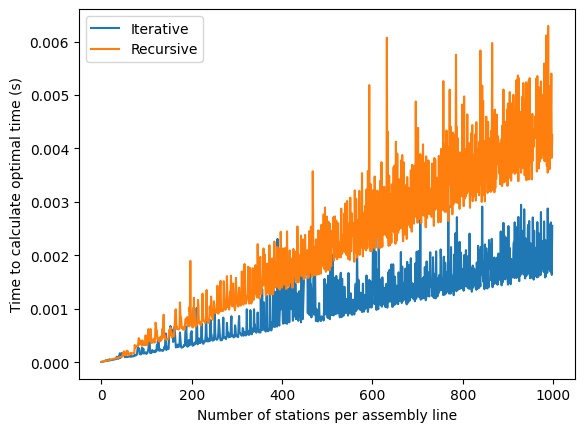

In [15]:
import matplotlib.pyplot as plt

plt.ylabel('Time to calculate optimal time (s)')
plt.xlabel('Number of stations per assembly line')
plt.plot([time_it(set_up_systems_for_n_stations(n)[-1].get_optimal_time)[0] for n in range(1, 1000)], label='Iterative')
plt.plot([time_it(set_up_systems_for_n_stations(n)[0].get_optimal_time)[0] for n in range(1, 1000)], label='Recursive')
plt.legend()
plt.show()